# Stock price prediction using LSTM
---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

### Imports

In [13]:
df=pd.read_csv("Tata-steel.csv")
df.head()

,Date,Open,High,Low,Close
0,03-07-2015,308.00,308.00,299.75,300.95
1,06-07-2015,294.90,299.60,292.30,298.75
2,07-07-2015,300.75,303.25,296.00,297.45
3,08-07-2015,293.80,294.00,282.00,283.40
4,09-07-2015,285.20,287.25,279.60,280.55


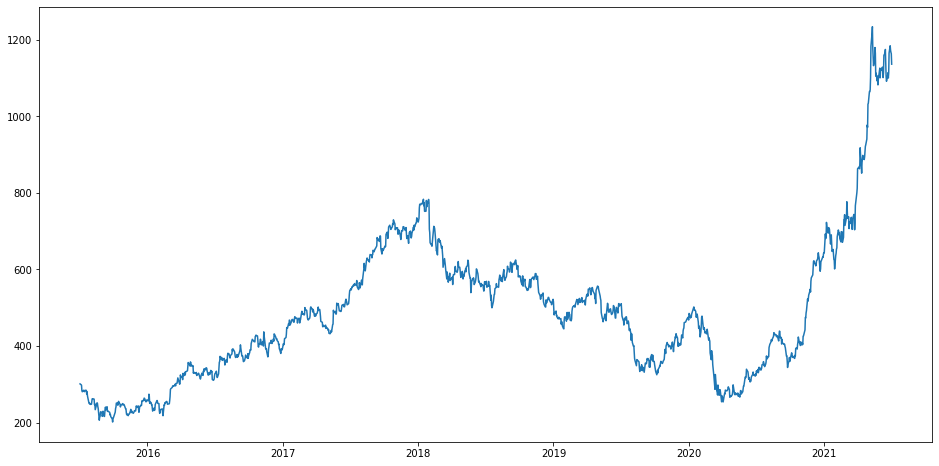

In [14]:
#df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [15]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [16]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

dataset=new_dataset.values

train_data=dataset[0:987,:]
valid_data=dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [17]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 17s - loss: 9.8380e-04 - 17s/epoch - 19ms/step


In [18]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [19]:
lstm_model.save("saved_model.h5")

C:\Users\Mellow\AppData\Local\Temp\ipykernel_17248\2471421548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


Text(0, 0.5, 'Closing Rate')

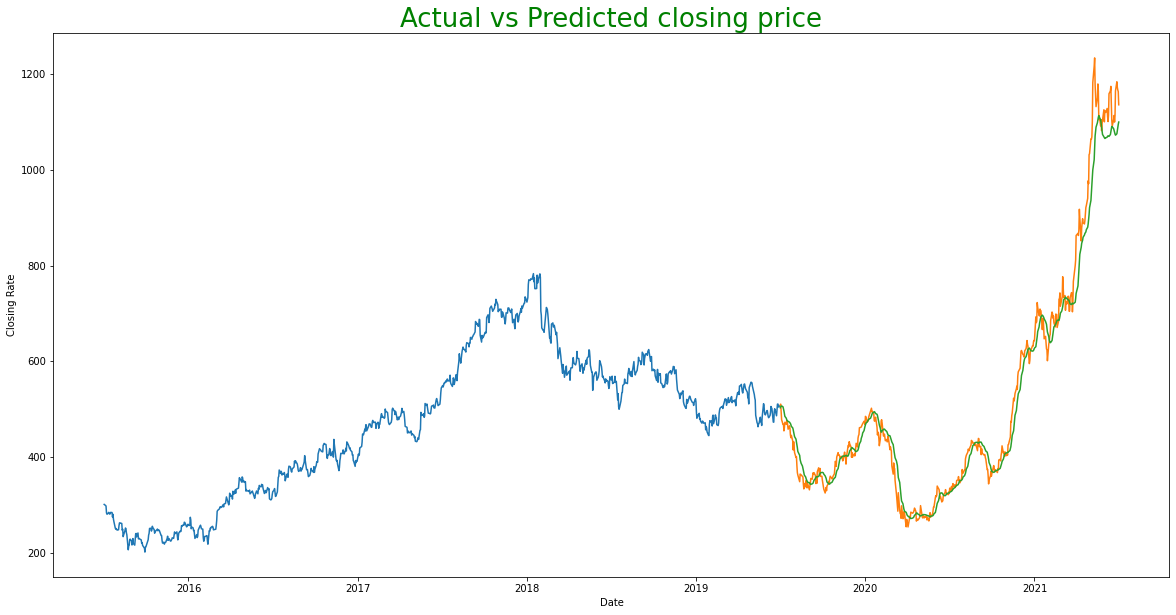

In [25]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])
plt.title(label="Actual vs Predicted closing price",
          fontsize=26,
          color="green")
#plt.title("Actual vs Predicted closing price")
plt.xlabel('Date')
plt.ylabel('Closing Rate') 